/tmp/ipython-input-3884359657.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_ticker, start='2020-01-01', end=None)
[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AAPL:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146957  72.753839  71.926930  72.497545  108872000
2020-01-08  73.307518  73.609752  71.849540  71.849540  132079200

Model training complete.

Mean Absolute Error (MAE): $2.05
R-squared (R²): 1.00


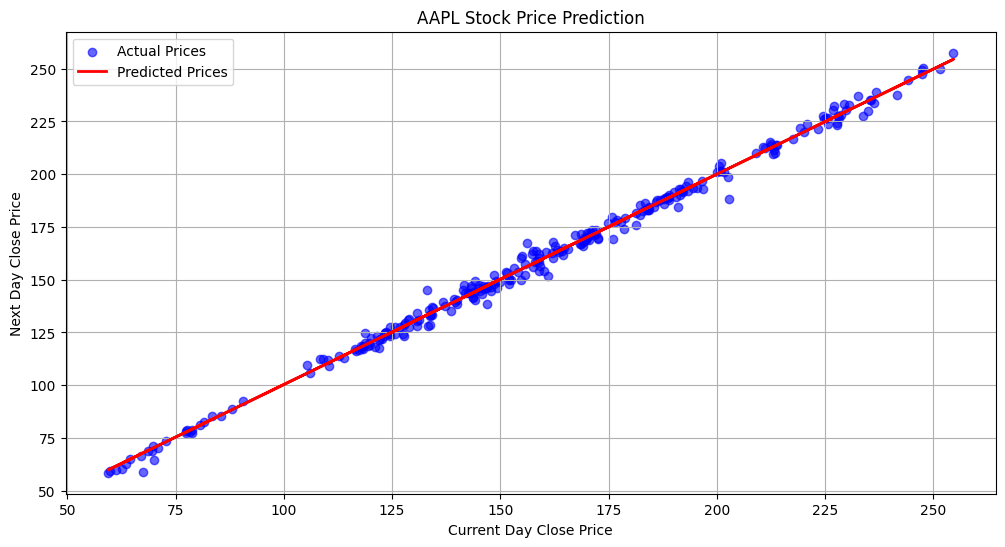

An error occurred: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.


In [1]:
# Step 1: Import Libraries
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Step 2: Get the Data
# We'll get the stock data for Apple (AAPL) from the last 5 years.
try:
    stock_ticker = 'AAPL'
    stock_data = yf.download(stock_ticker, start='2020-01-01', end=None)

    # Check if data was downloaded
    if stock_data.empty:
        print(f"No data found for ticker {stock_ticker}. Please check the ticker symbol.")
    else:
        print(f"Successfully downloaded data for {stock_ticker}:")
        print(stock_data.head()) # Display the first 5 rows

        # Step 3: Prepare the Data
        # We want to predict the next day's 'Close' price.
        # Let's create a new column 'Next_Close' which is the 'Close' price shifted by 1 day.
        stock_data['Next_Close'] = stock_data['Close'].shift(-1)

        # Remove the last row which will have a NaN value for 'Next_Close'
        stock_data.dropna(inplace=True)

        # Our feature (X) will be the current day's 'Close' price.
        # Our target (y) will be the next day's 'Close' price.
        X = stock_data[['Close']]
        y = stock_data['Next_Close']

        # Split the data into training (80%) and testing (20%) sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Step 4: Create and Train the Linear Regression Model
        model = LinearRegression()
        model.fit(X_train, y_train)
        print("\nModel training complete.")

        # Step 5: Make Predictions and Evaluate the Model
        y_pred = model.predict(X_test)

        # Calculate the Mean Absolute Error (MAE)
        # This tells us, on average, how far off our predictions are.
        mae = mean_absolute_error(y_test, y_pred)
        print(f"\nMean Absolute Error (MAE): ${mae:.2f}")

        # You can also check the R-squared (R^2) score
        # This tells us how much of the variance in the target variable is explained by our model.
        r2_score = model.score(X_test, y_test)
        print(f"R-squared (R²): {r2_score:.2f}")

        # Step 6: Visualize the Results
        plt.figure(figsize=(12, 6))
        plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
        plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
        plt.title(f'{stock_ticker} Stock Price Prediction')
        plt.xlabel('Current Day Close Price')
        plt.ylabel('Next Day Close Price')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Step 7: Predict the Next Day's Price
        # Get the last row of the original dataframe to predict the *actual* next day's price
        last_known_price = stock_data[['Close']].iloc[-1]
        predicted_next_day_price = model.predict(last_known_price)

        print(f"\nLast known closing price: ${last_known_price.iloc[0]['Close']:.2f}")
        print(f"Predicted price for the next trading day: ${predicted_next_day_price[0]:.2f}")

except Exception as e:
    print(f"An error occurred: {e}")